# Broad tissue breadth eQTLs

### Imports

In [1]:
library(ggplot2)
library(extrafont)
library(scales)
library(reshape2)
library(forcats)
library(ggrepel)
library(patchwork)
library(cowplot)
library(viridis)
library(ggsignif)

Registering fonts with R


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [2]:
source("https://gist.githubusercontent.com/benmarwick/2a1bb0133ff568cbe28d/raw/fb53bd97121f7f9ce947837ef1a4c65a73bffb3f/geom_flat_violin.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
theme_Publication <- function(base_size=14, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               legend.spacing = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

## Analysis

### Number of tissues affected per eQTLs

#### Bonferroni-corrected

##### All eQTLs

## Ohnologs, SSDs, singletons

### Proportion affected by broad tissue breadth eQTLs

##### Bonferroni-corrected

In [4]:
affectedByBroadBonferronieQTLsOhnologs <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadBonferronieQTLsOhnologs.csv")
summary(affectedByBroadBonferronieQTLsOhnologs)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name   
 Length:3617        Min.   :14.00   Min.   :16.00    Length:3617       
 Class :character   1st Qu.:17.00   1st Qu.:48.00    Class :character  
 Mode  :character   Median :22.00   Median :48.00    Mode  :character  
                    Mean   :24.99   Mean   :47.31                      
                    3rd Qu.:31.00   3rd Qu.:48.00                      
                    Max.   :48.00   Max.   :48.00                      
 Gene.Start..bp.     Gene.End..bp.           Strand              type          
 Min.   :    47225   Min.   :    73545   Min.   :-1.000000   Length:3617       
 1st Qu.: 29179477   1st Qu.: 29284239   1st Qu.:-1.000000   Class :character  
 Median : 55401927   Median : 55459699   Median :-1.000000   Mode  :character  
 Mean   : 70886036   Mean   : 70941954   Mean   :-0.001935                     
 3rd Qu.:104000592   3rd Qu.:104021040   3rd Qu.: 1.000000                     
 Max.   :2491046

In [5]:
table(affectedByBroadBonferronieQTLsOhnologs[,c("type","affectedByBroad")])

           affectedByBroad
type           N    Y
  ohno       349  604
  singleton  341  967
  SSD        341 1015

In [6]:
(Xsq <- chisq.test(table(affectedByBroadBonferronieQTLsOhnologs[,c("type","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test

data:  table(affectedByBroadBonferronieQTLsOhnologs[, c("type", "affectedByBroad")])
X-squared = 42.109, df = 2, p-value = 7.179e-10


           affectedByBroad
type           N    Y
  ohno       349  604
  singleton  341  967
  SSD        341 1015

,N,Y
ohno,271.6458,681.3542
singleton,372.8361,935.1639
SSD,386.5181,969.4819


           affectedByBroad
type                N         Y
  ohno       6.467691 -6.467691
  singleton -2.440521  2.440521
  SSD       -3.463245  3.463245

In [7]:
round(604/(604+349), 3)

[1] 0.634

In [8]:
round(967/(967+341), 3)

[1] 0.739

In [9]:
round(1015/(1015+341), 3)

[1] 0.749

In [10]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 7.17944e-09

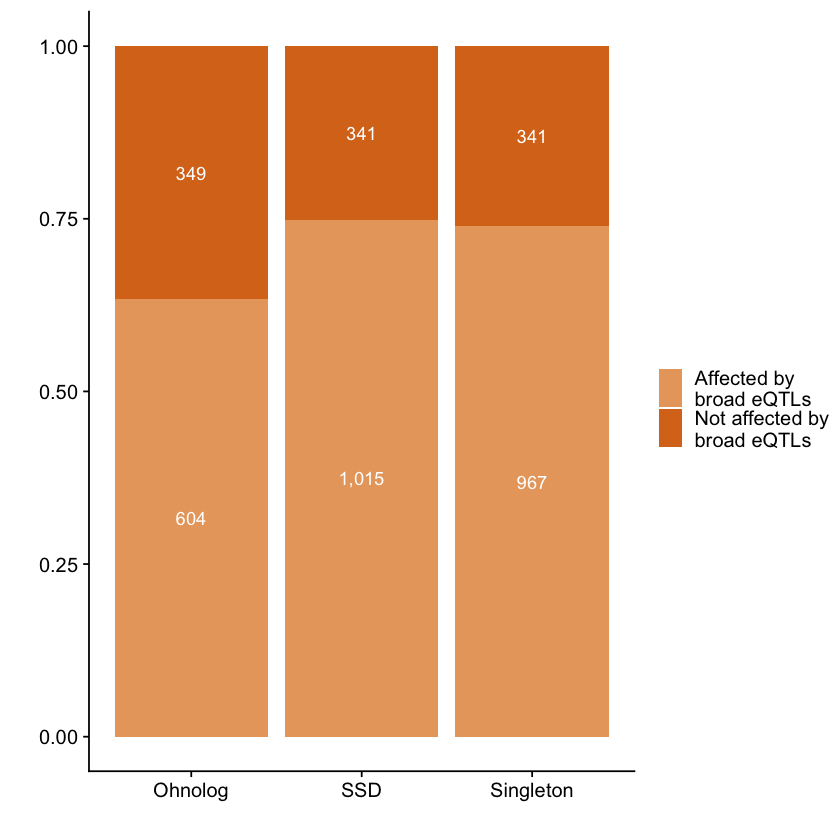

In [11]:
ohnolog_bar_chart_bonferroni <- ggplot(data=melt(table(affectedByBroadBonferronieQTLsOhnologs[,c("type","affectedByBroad")])), aes(type, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="",
        limits=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

ohnolog_bar_chart_bonferroni

##### Metasoft eQTLs

In [12]:
affectedByBroadMetasofteQTLsOhnologs <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadMetasofteQTLsOhnologs.csv")
summary(affectedByBroadMetasofteQTLsOhnologs)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name   
 Length:7383        Min.   :43.00   Min.   :43.00    Length:7383       
 Class :character   1st Qu.:46.00   1st Qu.:48.00    Class :character  
 Mode  :character   Median :48.00   Median :48.00    Mode  :character  
                    Mean   :47.01   Mean   :47.82                      
                    3rd Qu.:48.00   3rd Qu.:48.00                      
                    Max.   :48.00   Max.   :48.00                      
 Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 1st Qu.: 30664811   1st Qu.: 30685859   1st Qu.:-1.000000  
 Median : 56732663   Median : 56771200   Median : 1.000000  
 Mean   : 71397652   Mean   : 71457740   Mean   : 0.009075  
 3rd Qu.:104582998   3rd Qu.:104601908   3rd Qu.: 1.000000  
 Max.   :249104648   Max.   :249120832   Max.   : 1.000000  
 propOfExpressedAffectedByeQTL     type           affectedByBroad   


In [13]:
table(affectedByBroadMetasofteQTLsOhnologs[,c("type","affectedByBroad")])

           affectedByBroad
type           N    Y
  ohno      1186  993
  singleton 1021 1638
  SSD       1062 1483

In [14]:
(Xsq <- chisq.test(table(affectedByBroadMetasofteQTLsOhnologs[,c("type","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test

data:  table(affectedByBroadMetasofteQTLsOhnologs[, c("type", "affectedByBroad")])
X-squared = 134.96, df = 2, p-value < 2.2e-16


           affectedByBroad
type           N    Y
  ohno      1186  993
  singleton 1021 1638
  SSD       1062 1483

,N,Y
ohno,964.8044,1214.196
singleton,1177.3359,1481.664
SSD,1126.8597,1418.140


           affectedByBroad
type                 N          Y
  ohno       11.362892 -11.362892
  singleton  -7.630523   7.630523
  SSD        -3.197479   3.197479

In [15]:
round(993/(993+1186), 3)

[1] 0.456

In [16]:
round(1638/(1638+1021), 3)

[1] 0.616

In [17]:
round(1483/(1483+1062), 3)

[1] 0.583

In [18]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 4.932934e-29

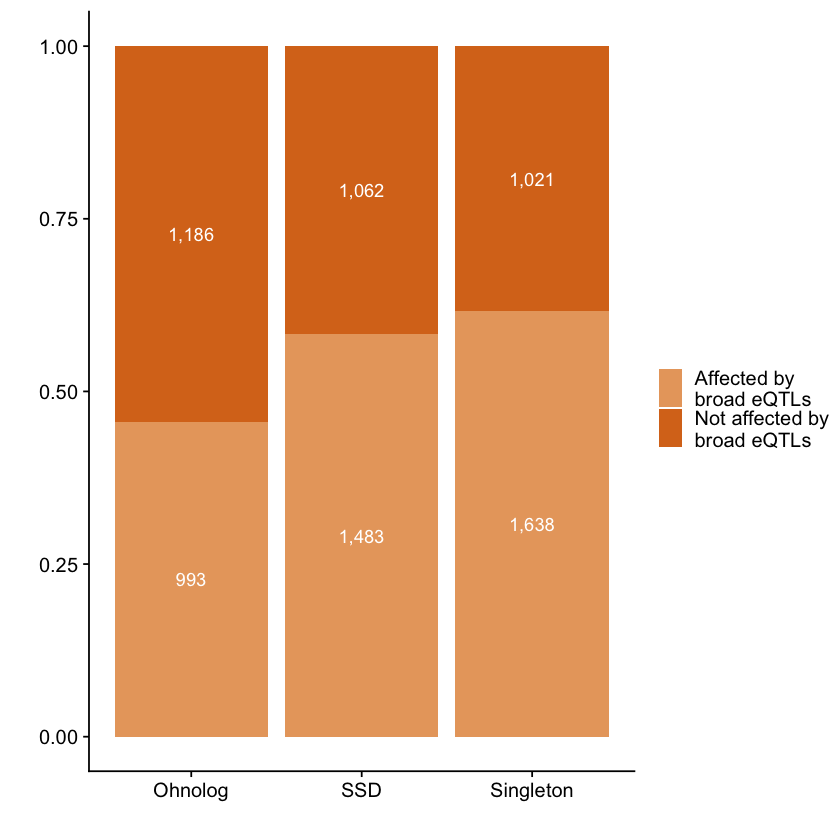

In [19]:
ohnolog_bar_chart_metasoft <- ggplot(data=melt(table(affectedByBroadMetasofteQTLsOhnologs[,c("type","affectedByBroad")])), aes(type, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="",
        limits=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

ohnolog_bar_chart_metasoft

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

## CNVs (Zarrei et al. CNV map)

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [20]:
affectedByBroadBonferronieQTLsCNVZarrei <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadBonferronieQTLsCNVZarrei.csv")
summary(affectedByBroadBonferronieQTLsCNVZarrei)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name   
 Length:3617        Min.   :14.00   Min.   :16.00    Length:3617       
 Class :character   1st Qu.:17.00   1st Qu.:48.00    Class :character  
 Mode  :character   Median :22.00   Median :48.00    Mode  :character  
                    Mean   :24.99   Mean   :47.31                      
                    3rd Qu.:31.00   3rd Qu.:48.00                      
                    Max.   :48.00   Max.   :48.00                      
 Gene.Start..bp.     Gene.End..bp.           Strand              CNV           
 Min.   :    47225   Min.   :    73545   Min.   :-1.000000   Length:3617       
 1st Qu.: 29179477   1st Qu.: 29284239   1st Qu.:-1.000000   Class :character  
 Median : 55401927   Median : 55459699   Median :-1.000000   Mode  :character  
 Mean   : 70886036   Mean   : 70941954   Mean   :-0.001935                     
 3rd Qu.:104000592   3rd Qu.:104021040   3rd Qu.: 1.000000                     
 Max.   :2491046

In [21]:
table(affectedByBroadBonferronieQTLsCNVZarrei[,c("CNV","affectedByBroad")])

   affectedByBroad
CNV    N    Y
  N  575 1488
  Y  456 1098

In [22]:
(Xsq <- chisq.test(table(affectedByBroadBonferronieQTLsCNVZarrei[,c("CNV","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadBonferronieQTLsCNVZarrei[, c("CNV", "affectedByBroad")])
X-squared = 0.87104, df = 1, p-value = 0.3507


   affectedByBroad
CNV    N    Y
  N  575 1488
  Y  456 1098

,N,Y
N,588.0434,1474.957
Y,442.9566,1111.043


   affectedByBroad
CNV          N          Y
  N -0.9704989  0.9704989
  Y  0.9704989 -0.9704989

In [23]:
round(1488/(1488+575), 3)

[1] 0.721

In [24]:
round(1098/(1098+456), 3)

[1] 0.707

In [25]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 1

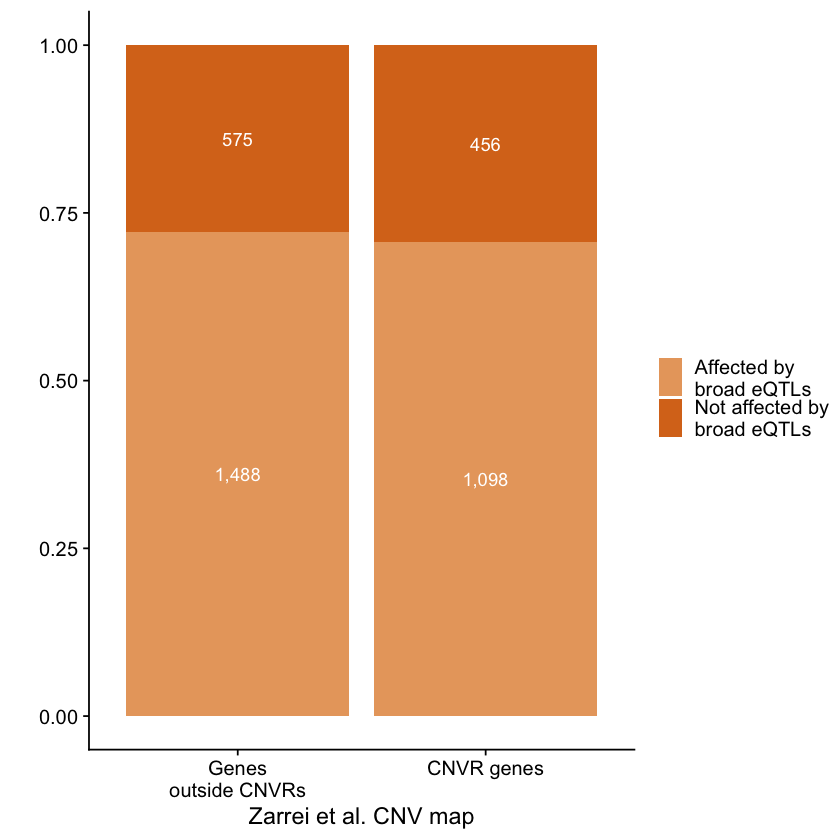

In [26]:
zarrei_bar_chart_bonferroni <- ggplot(data=melt(table(affectedByBroadBonferronieQTLsCNVZarrei[,c("CNV","affectedByBroad")])), aes(CNV, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="Zarrei et al. CNV map",
        breaks=c("N", "Y"),
        labels=c("Genes\noutside CNVRs", "CNVR genes")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

zarrei_bar_chart_bonferroni

##### Metasoft eQTLs

In [27]:
affectedByBroadMetasofteQTLsCNVZarrei <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadMetasofteQTLsCNVZarrei.csv")
summary(affectedByBroadMetasofteQTLsCNVZarrei)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name   
 Length:7383        Min.   :43.00   Min.   :43.00    Length:7383       
 Class :character   1st Qu.:46.00   1st Qu.:48.00    Class :character  
 Mode  :character   Median :48.00   Median :48.00    Mode  :character  
                    Mean   :47.01   Mean   :47.82                      
                    3rd Qu.:48.00   3rd Qu.:48.00                      
                    Max.   :48.00   Max.   :48.00                      
 Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 1st Qu.: 30664811   1st Qu.: 30685859   1st Qu.:-1.000000  
 Median : 56732663   Median : 56771200   Median : 1.000000  
 Mean   : 71397652   Mean   : 71457740   Mean   : 0.009075  
 3rd Qu.:104582998   3rd Qu.:104601908   3rd Qu.: 1.000000  
 Max.   :249104648   Max.   :249120832   Max.   : 1.000000  
 propOfExpressedAffectedByeQTL     CNV            affectedByBroad   


In [28]:
table(affectedByBroadMetasofteQTLsCNVZarrei[,c("CNV","affectedByBroad")])

   affectedByBroad
CNV    N    Y
  N 1970 2488
  Y 1299 1626

In [29]:
(Xsq <- chisq.test(table(affectedByBroadMetasofteQTLsCNVZarrei[,c("CNV","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadMetasofteQTLsCNVZarrei[, c("CNV", "affectedByBroad")])
X-squared = 0.026314, df = 1, p-value = 0.8711


   affectedByBroad
CNV    N    Y
  N 1970 2488
  Y 1299 1626

,N,Y
N,1973.886,2484.114
Y,1295.114,1629.886


   affectedByBroad
CNV          N          Y
  N -0.1861679  0.1861679
  Y  0.1861679 -0.1861679

In [30]:
round(2488/(2488+1970), 3)

[1] 0.558

In [31]:
round(1626/(1626+1299), 3)

[1] 0.556

In [32]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 1

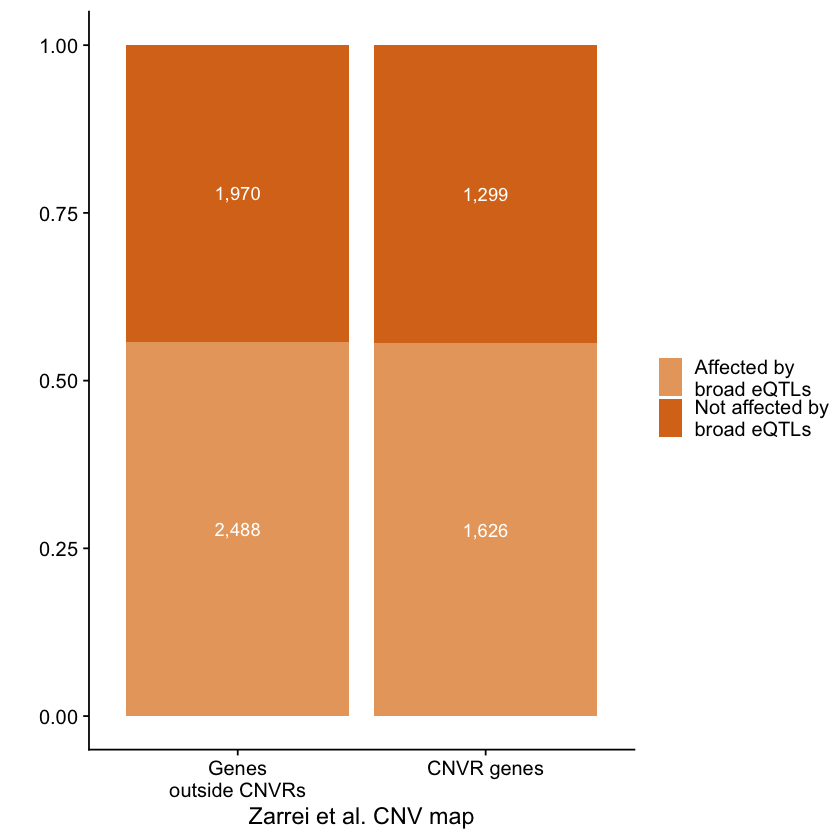

In [33]:
zarrei_bar_chart_metasoft <- ggplot(data=melt(table(affectedByBroadMetasofteQTLsCNVZarrei[,c("CNV","affectedByBroad")])), aes(CNV, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="Zarrei et al. CNV map",
        breaks=c("N", "Y"),
        labels=c("Genes\noutside CNVRs", "CNVR genes")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

zarrei_bar_chart_metasoft

## CNVs (ExAC CNV data)

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [34]:
affectedByBroadBonferronieQTLsCNVExAC <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadBonferronieQTLsCNVExAC.csv")
summary(affectedByBroadBonferronieQTLsCNVExAC)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name
 Length:2883        Min.   :14.00   Min.   :16.00    Min.   : 1.0   
 Class :character   1st Qu.:17.00   1st Qu.:48.00    1st Qu.: 4.0   
 Mode  :character   Median :22.00   Median :48.00    Median :10.0   
                    Mean   :24.47   Mean   :47.51    Mean   :10.1   
                    3rd Qu.:30.00   3rd Qu.:48.00    3rd Qu.:16.0   
                    Max.   :48.00   Max.   :48.00    Max.   :22.0   
 Gene.Start..bp.     Gene.End..bp.           Strand              gene          
 Min.   :    62293   Min.   :   207428   Min.   :-1.000000   Length:2883       
 1st Qu.: 30497371   1st Qu.: 30555776   1st Qu.:-1.000000   Class :character  
 Median : 56634039   Median : 56661024   Median :-1.000000   Mode  :character  
 Mean   : 71611962   Mean   : 71670511   Mean   :-0.003122                     
 3rd Qu.:105530970   3rd Qu.:105616354   3rd Qu.: 1.000000                     
 Max.   :249104648   Max.   :24912083

In [35]:
table(affectedByBroadBonferronieQTLsCNVExAC[,c("CNV","affectedByBroad")])

   affectedByBroad
CNV    N    Y
  N   67  165
  Y  786 1865

In [36]:
(Xsq <- chisq.test(table(affectedByBroadBonferronieQTLsCNVExAC[,c("CNV","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadBonferronieQTLsCNVExAC[, c("CNV", "affectedByBroad")])
X-squared = 0.029364, df = 1, p-value = 0.8639


   affectedByBroad
CNV    N    Y
  N   67  165
  Y  786 1865

,N,Y
N,68.64239,163.3576
Y,784.35761,1866.6424


   affectedByBroad
CNV          N          Y
  N -0.2463604  0.2463604
  Y  0.2463604 -0.2463604

In [37]:
round(165/(165+67), 3)

[1] 0.711

In [38]:
round(1865/(1865+786), 3)

[1] 0.704

In [39]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 1

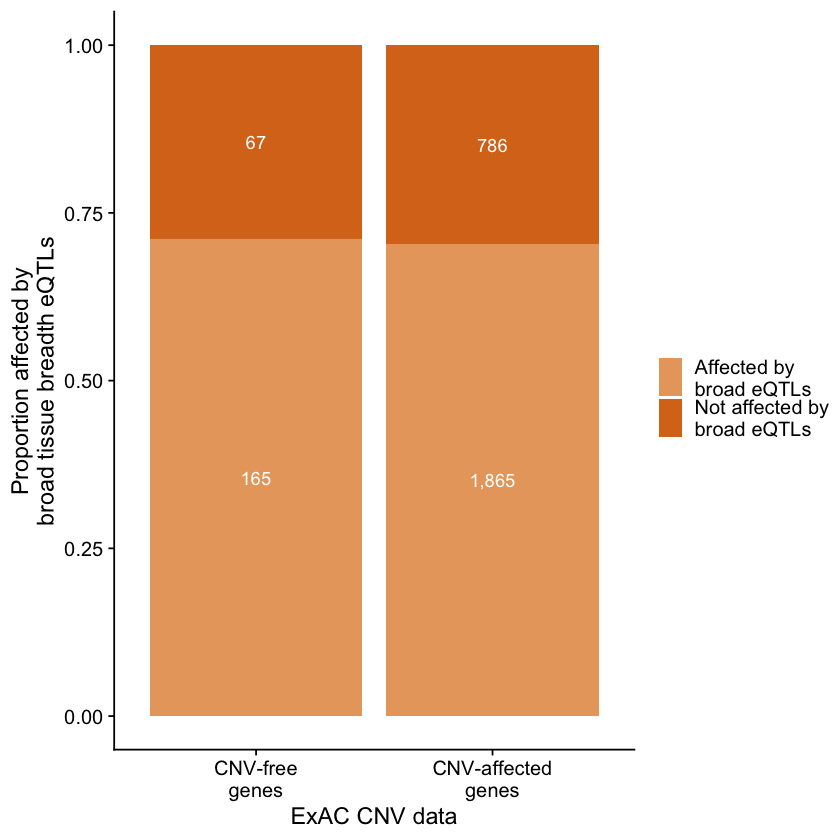

In [40]:
exac_bar_chart_bonferroni <- ggplot(data=melt(table(affectedByBroadBonferronieQTLsCNVExAC[,c("CNV","affectedByBroad")])), aes(CNV, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="Proportion affected by\nbroad tissue breadth eQTLs") +
    scale_x_discrete(name="ExAC CNV data",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

exac_bar_chart_bonferroni

##### Metasoft eQTLs

In [41]:
affectedByBroadMetasofteQTLsCNVExAC <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadMetasofteQTLsCNVExAC.csv")
summary(affectedByBroadMetasofteQTLsCNVExAC)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name 
 Length:6106        Min.   :43      Min.   :43.00    Min.   : 1.000  
 Class :character   1st Qu.:46      1st Qu.:48.00    1st Qu.: 4.000  
 Mode  :character   Median :48      Median :48.00    Median :10.000  
                    Mean   :47      Mean   :47.85    Mean   : 9.977  
                    3rd Qu.:48      3rd Qu.:48.00    3rd Qu.:16.000  
                    Max.   :48      Max.   :48.00    Max.   :22.000  
 Gene.Start..bp.     Gene.End..bp.           Strand          
 Min.   :    62293   Min.   :   197342   Min.   :-1.0000000  
 1st Qu.: 31195202   1st Qu.: 31243296   1st Qu.:-1.0000000  
 Median : 57525976   Median : 57570350   Median :-1.0000000  
 Mean   : 72166375   Mean   : 72228906   Mean   :-0.0003275  
 3rd Qu.:106805427   3rd Qu.:106882059   3rd Qu.: 1.0000000  
 Max.   :249104648   Max.   :249120832   Max.   : 1.0000000  
     gene                chr             start                end           

In [42]:
table(affectedByBroadMetasofteQTLsCNVExAC[,c("CNV","affectedByBroad")])

   affectedByBroad
CNV    N    Y
  N  284  306
  Y 2515 3001

In [43]:
(Xsq <- chisq.test(table(affectedByBroadMetasofteQTLsCNVExAC[,c("CNV","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadMetasofteQTLsCNVExAC[, c("CNV", "affectedByBroad")])
X-squared = 1.2856, df = 1, p-value = 0.2569


   affectedByBroad
CNV    N    Y
  N  284  306
  Y 2515 3001

,N,Y
N,270.4569,319.5431
Y,2528.5431,2987.4569


   affectedByBroad
CNV         N         Y
  N  1.177323 -1.177323
  Y -1.177323  1.177323

In [44]:
round(306/(306+284), 3)

[1] 0.519

In [45]:
round(3001/(3001+2515), 3)

[1] 0.544

In [46]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 1

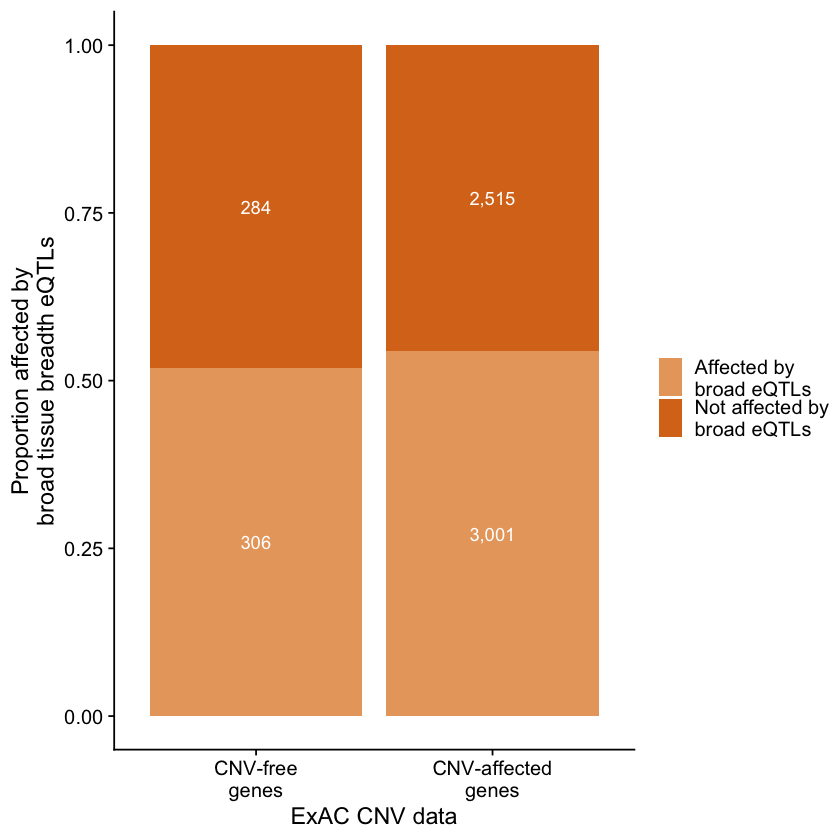

In [47]:
exac_bar_chart_metasoft <- ggplot(data=melt(table(affectedByBroadMetasofteQTLsCNVExAC[,c("CNV","affectedByBroad")])), aes(CNV, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="Proportion affected by\nbroad tissue breadth eQTLs") +
    scale_x_discrete(name="ExAC CNV data",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

exac_bar_chart_metasoft

## Haploinsuffificent genes

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [48]:
affectedByBroadBonferronieQTLsHaplo <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadBonferronieQTLsHaplo.csv")
summary(affectedByBroadBonferronieQTLsHaplo)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name
 Length:3338        Min.   :14.00   Min.   :16.00    Min.   : 1.00  
 Class :character   1st Qu.:17.00   1st Qu.:48.00    1st Qu.: 4.00  
 Mode  :character   Median :22.00   Median :48.00    Median :10.00  
                    Mean   :24.83   Mean   :47.41    Mean   :10.24  
                    3rd Qu.:31.00   3rd Qu.:48.00    3rd Qu.:16.00  
                    Max.   :48.00   Max.   :48.00    Max.   :22.00  
 Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   :    47225   Min.   :    73545   Min.   :-1.000000  
 1st Qu.: 29542503   1st Qu.: 29581743   1st Qu.:-1.000000  
 Median : 55499038   Median : 55531071   Median :-1.000000  
 Mean   : 70678632   Mean   : 70735393   Mean   :-0.003595  
 3rd Qu.:103067362   3rd Qu.:103253629   3rd Qu.: 1.000000  
 Max.   :249104648   Max.   :249120832   Max.   : 1.000000  
      pLI               haplo           propOfExpressedAffectedByeQTL
 Min.   :0.0000000  

In [49]:
table(affectedByBroadBonferronieQTLsHaplo[,c("haplo","affectedByBroad")])

     affectedByBroad
haplo    N    Y
    N  873 2155
    Y   95  215

In [50]:
(Xsq <- chisq.test(table(affectedByBroadBonferronieQTLsHaplo[,c("haplo","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadBonferronieQTLsHaplo[, c("haplo", "affectedByBroad")])
X-squared = 0.36575, df = 1, p-value = 0.5453


     affectedByBroad
haplo    N    Y
    N  873 2155
    Y   95  215

,N,Y
N,878.10186,2149.8981
Y,89.89814,220.1019


     affectedByBroad
haplo          N          Y
    N -0.6704821  0.6704821
    Y  0.6704821 -0.6704821

In [51]:
round(2155/(2155+873), 3)

[1] 0.712

In [52]:
round(215/(215+95), 3)

[1] 0.694

In [53]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 1

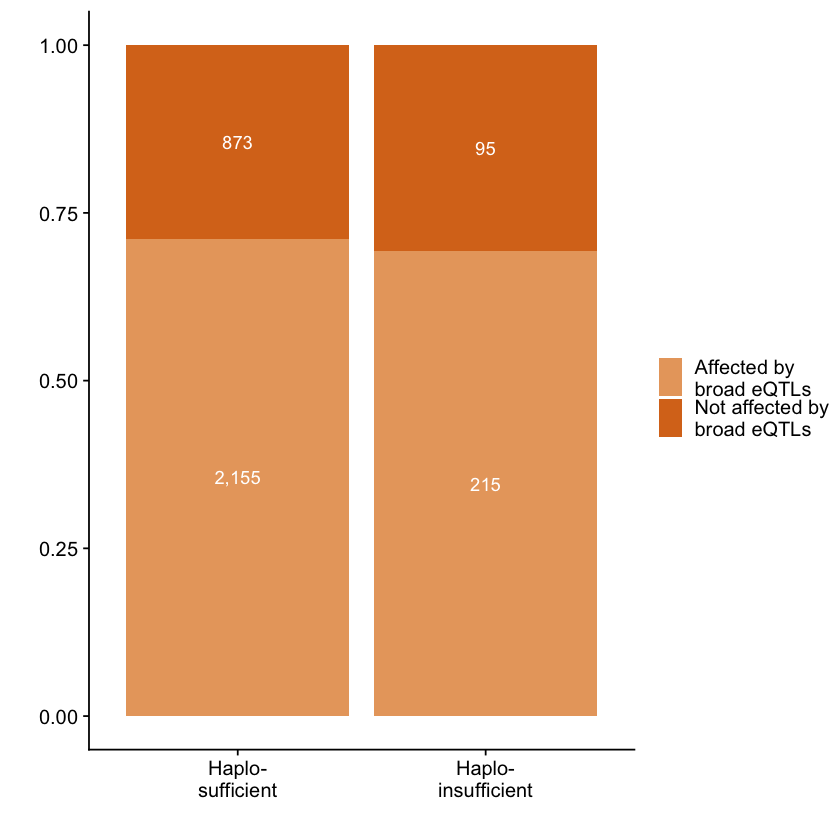

In [54]:
haplo_bar_chart_bonferroni <- ggplot(data=melt(table(affectedByBroadBonferronieQTLsHaplo[,c("haplo","affectedByBroad")])), aes(haplo, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

haplo_bar_chart_bonferroni

##### Metasoft eQTLs

In [55]:
affectedByBroadMetasofteQTLsHaplo <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadMetasofteQTLsHaplo.csv")
summary(affectedByBroadMetasofteQTLsHaplo)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name
 Length:6874        Min.   :43.00   Min.   :43.00    Min.   : 1.00  
 Class :character   1st Qu.:46.00   1st Qu.:48.00    1st Qu.: 4.00  
 Mode  :character   Median :48.00   Median :48.00    Median :10.00  
                    Mean   :47.01   Mean   :47.84    Mean   :10.13  
                    3rd Qu.:48.00   3rd Qu.:48.00    3rd Qu.:16.00  
                    Max.   :48.00   Max.   :48.00    Max.   :22.00  
 Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 1st Qu.: 30785362   1st Qu.: 30870724   1st Qu.:-1.000000  
 Median : 56919046   Median : 56985907   Median : 1.000000  
 Mean   : 71474677   Mean   : 71535556   Mean   : 0.005819  
 3rd Qu.:104680456   3rd Qu.:104689649   3rd Qu.: 1.000000  
 Max.   :249104648   Max.   :249120832   Max.   : 1.000000  
      pLI               haplo           propOfExpressedAffectedByeQTL
 Min.   :0.0000000  

In [56]:
table(affectedByBroadMetasofteQTLsHaplo[,c("haplo","affectedByBroad")])

     affectedByBroad
haplo    N    Y
    N 2566 3334
    Y  517  457

In [57]:
(Xsq <- chisq.test(table(affectedByBroadMetasofteQTLsHaplo[,c("haplo","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadMetasofteQTLsHaplo[, c("haplo", "affectedByBroad")])
X-squared = 30.688, df = 1, p-value = 3.031e-08


     affectedByBroad
haplo    N    Y
    N 2566 3334
    Y  517  457

,N,Y
N,2646.1594,3253.8406
Y,436.8406,537.1594


     affectedByBroad
haplo         N         Y
    N -5.574422  5.574422
    Y  5.574422 -5.574422

In [58]:
round(3334/(3334+2566), 3)

[1] 0.565

In [59]:
round(457/(457+517), 3)

[1] 0.469

In [60]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 3.030749e-07

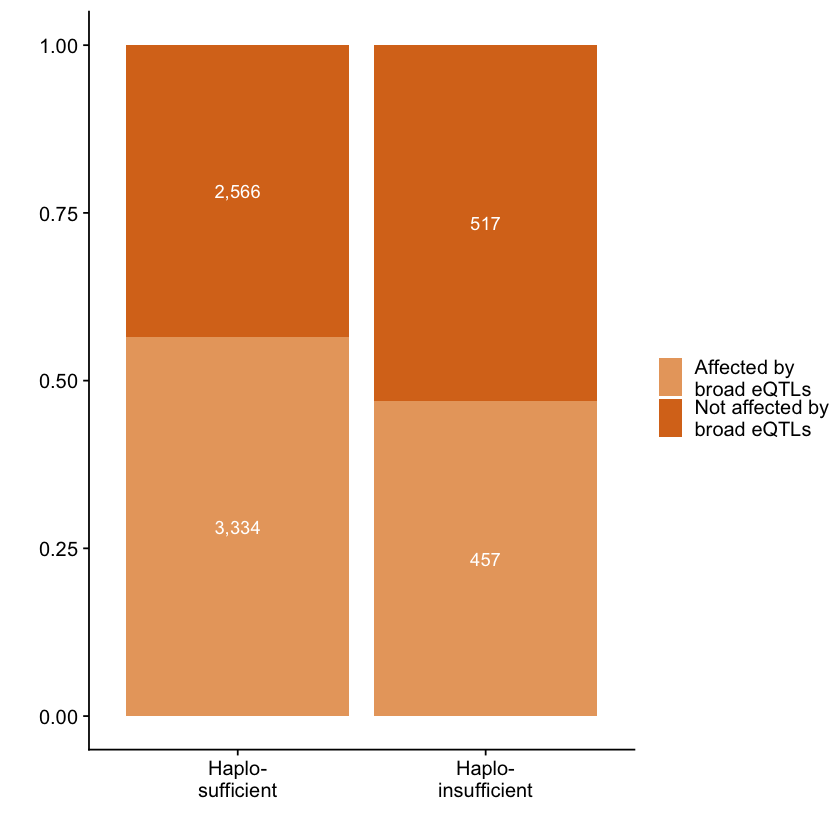

In [61]:
haplo_bar_chart_metasoft <- ggplot(data=melt(table(affectedByBroadMetasofteQTLsHaplo[,c("haplo","affectedByBroad")])), aes(haplo, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

haplo_bar_chart_metasoft

## Conserved copy number genes

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [62]:
affectedByBroadBonferronieQTLsCCN <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadBonferronieQTLsCCN.csv")
summary(affectedByBroadBonferronieQTLsCCN)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name   
 Length:3527        Min.   :14.00   Min.   :16.00    Length:3527       
 Class :character   1st Qu.:17.00   1st Qu.:48.00    Class :character  
 Mode  :character   Median :22.00   Median :48.00    Mode  :character  
                    Mean   :24.91   Mean   :47.36                      
                    3rd Qu.:31.00   3rd Qu.:48.00                      
                    Max.   :48.00   Max.   :48.00                      
 Gene.Start..bp.     Gene.End..bp.           Strand             CCN           
 Min.   :    47225   Min.   :    73545   Min.   :-1.00000   Length:3527       
 1st Qu.: 29316745   1st Qu.: 29499692   1st Qu.:-1.00000   Class :character  
 Median : 55532032   Median : 55582659   Median :-1.00000   Mode  :character  
 Mean   : 70835732   Mean   : 70892394   Mean   :-0.00482                     
 3rd Qu.:104164088   3rd Qu.:104208408   3rd Qu.: 1.00000                     
 Max.   :249104648   M

In [63]:
table(affectedByBroadBonferronieQTLsCCN[,c("CCN","affectedByBroad")])

   affectedByBroad
CCN    N    Y
  N  615 1666
  Y  400  846

In [64]:
(Xsq <- chisq.test(table(affectedByBroadBonferronieQTLsCCN[,c("CCN","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadBonferronieQTLsCCN[, c("CCN", "affectedByBroad")])
X-squared = 10.141, df = 1, p-value = 0.00145


   affectedByBroad
CCN    N    Y
  N  615 1666
  Y  400  846

,N,Y
N,656.4261,1624.5739
Y,358.5739,887.4261


   affectedByBroad
CCN         N         Y
  N -3.223429  3.223429
  Y  3.223429 -3.223429

In [65]:
round(1666/(1666+615), 3)

[1] 0.73

In [66]:
round(846/(846+400), 3)

[1] 0.679

In [67]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 0.01449924

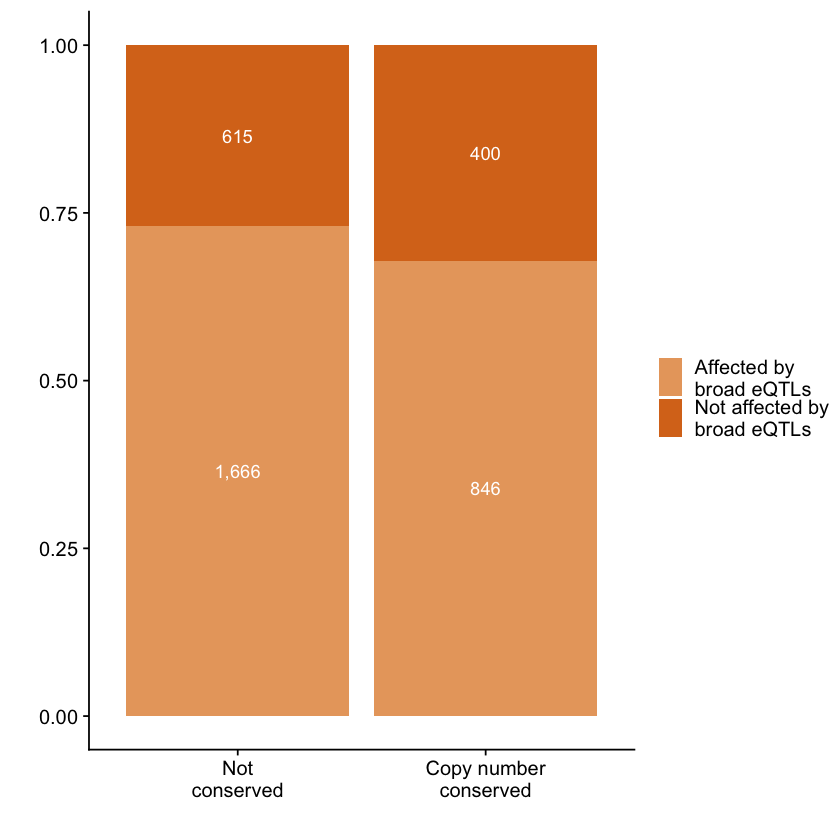

In [68]:
ccn_bar_chart_bonferroni <- ggplot(data=melt(table(affectedByBroadBonferronieQTLsCCN[,c("CCN","affectedByBroad")])), aes(CCN, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not\nconserved", "Copy number\nconserved")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

ccn_bar_chart_bonferroni

##### Metasoft eQTLs

In [69]:
affectedByBroadMetasofteQTLsCCN <- read.csv("../../outputFiles/eQTLsBroadBreadth/affectedByBroadMetasofteQTLsCCN.csv")
summary(affectedByBroadMetasofteQTLsCCN)

 Ensembl.Gene.ID    affectedTissues expressedTissues Chromosome.Name   
 Length:7241        Min.   :43.00   Min.   :43.00    Length:7241       
 Class :character   1st Qu.:46.00   1st Qu.:48.00    Class :character  
 Mode  :character   Median :48.00   Median :48.00    Mode  :character  
                    Mean   :47.01   Mean   :47.83                      
                    3rd Qu.:48.00   3rd Qu.:48.00                      
                    Max.   :48.00   Max.   :48.00                      
 Gene.Start..bp.     Gene.End..bp.           Strand              CCN           
 Min.   :     5810   Min.   :    31427   Min.   :-1.000000   Length:7241       
 1st Qu.: 30692200   1st Qu.: 30712331   1st Qu.:-1.000000   Class :character  
 Median : 56884752   Median : 56923940   Median : 1.000000   Mode  :character  
 Mean   : 71486222   Mean   : 71546988   Mean   : 0.007043                     
 3rd Qu.:105206543   3rd Qu.:105234831   3rd Qu.: 1.000000                     
 Max.   :2491046

In [70]:
table(affectedByBroadMetasofteQTLsCCN[,c("CCN","affectedByBroad")])

   affectedByBroad
CCN    N    Y
  N 1938 2613
  Y 1298 1392

In [71]:
(Xsq <- chisq.test(table(affectedByBroadMetasofteQTLsCCN[,c("CCN","affectedByBroad")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(affectedByBroadMetasofteQTLsCCN[, c("CCN", "affectedByBroad")])
X-squared = 21.751, df = 1, p-value = 3.105e-06


   affectedByBroad
CCN    N    Y
  N 1938 2613
  Y 1298 1392

,N,Y
N,2033.84,2517.16
Y,1202.16,1487.84


   affectedByBroad
CCN         N         Y
  N -4.688241  4.688241
  Y  4.688241 -4.688241

In [72]:
round(2613/(2613+1938), 3)

[1] 0.574

In [73]:
round(1392/(1392+1298), 3)

[1] 0.517

In [74]:
p.adjust(Xsq$p.value, method="bonferroni", n=10)

[1] 3.104502e-05

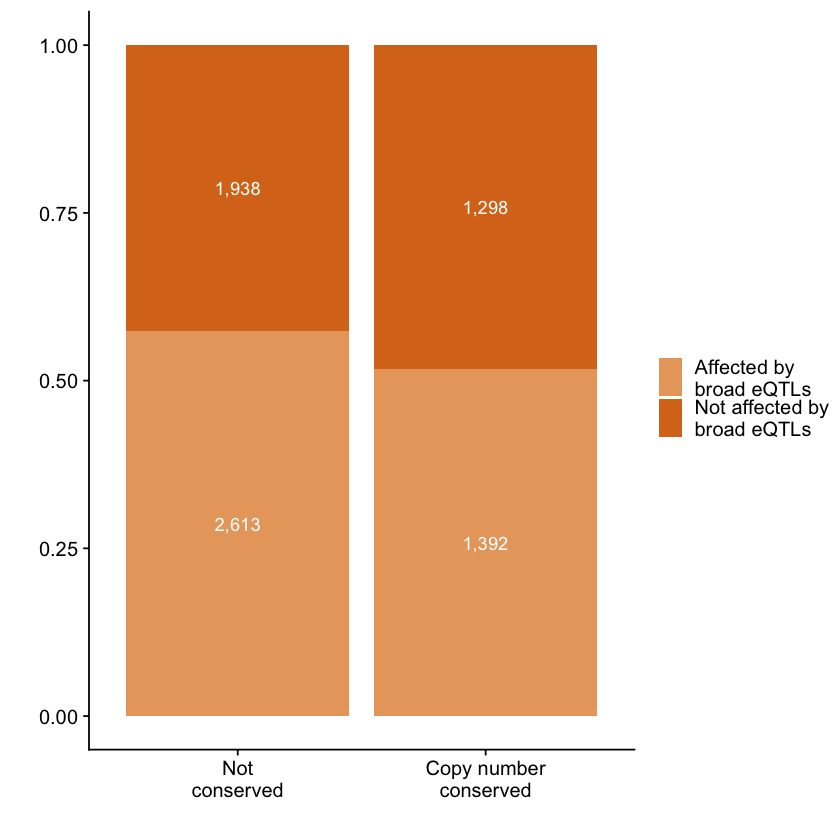

In [75]:
ccn_bar_chart_metasoft <- ggplot(data=melt(table(affectedByBroadMetasofteQTLsCCN[,c("CCN","affectedByBroad")])), aes(CCN, value)) +
    theme_cowplot() +
    geom_bar(aes(fill = affectedByBroad), stat="identity", position="fill") +
    scale_y_continuous(name="") +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not\nconserved", "Copy number\nconserved")) +
    scale_fill_manual(values=c("#e8a66c", "#d9751d"),
        name="",
        limits=c("Y", "N"),
        labels=c("Affected by\nbroad eQTLs", "Not affected by\nbroad eQTLs")) +
    geom_text(aes(label = prettyNum(value, big.mark=","),
               group=affectedByBroad),
          vjust=0.5,
          stat='identity',
          colour = "white",
          position = position_fill(vjust = .5)) +
    theme(legend.position = "right") #+
#    geom_signif(
#        xmin = "ohno",
#        xmax = "singleton",
#        y_position = 1.01,
#        annotation = paste0("P=", format(p.adjust(Xsq$p.value, method="bonferroni", n=10), digits = 3)),
#        size = 0,
#        tip_length = 0)

ccn_bar_chart_metasoft

## Plot figure

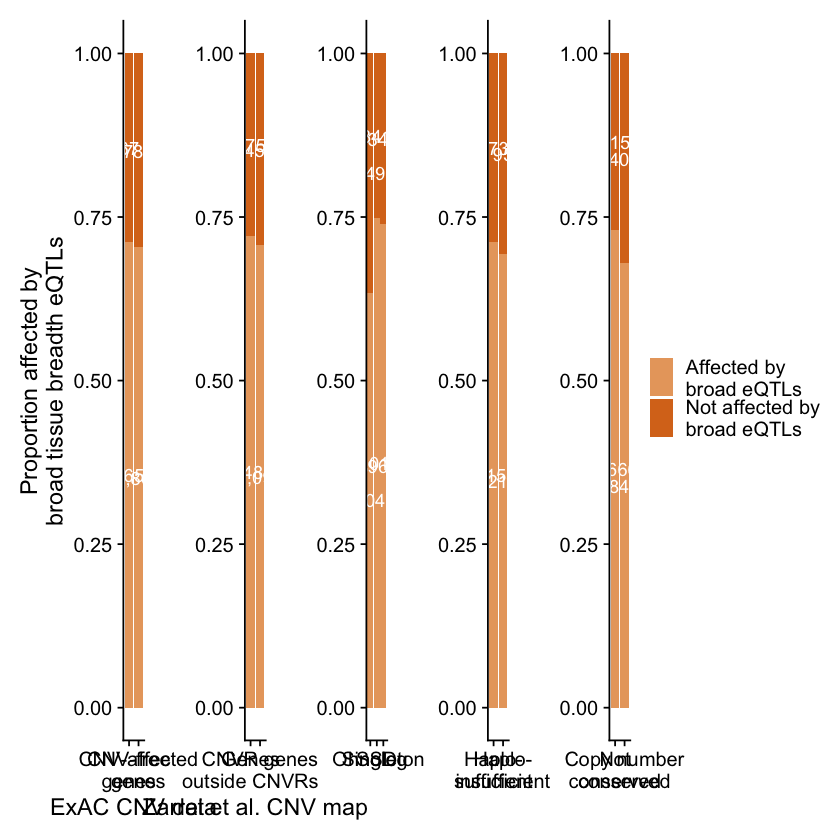

In [76]:
exac_bar_chart_bonferroni | zarrei_bar_chart_bonferroni | ohnolog_bar_chart_bonferroni | haplo_bar_chart_bonferroni | ccn_bar_chart_bonferroni | plot_layout(guides = 'collect')

In [77]:
ggsave('../../outputFiles/figures/broadTissueBreadtheQTLsBonferroni.svg', width=40, height=13, units="cm")

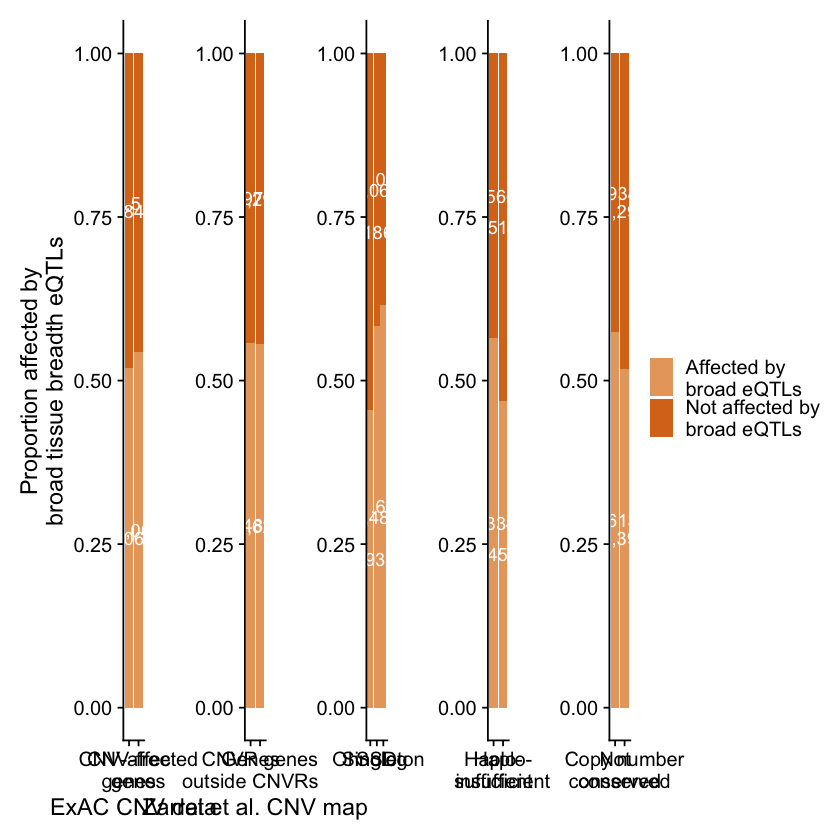

In [78]:
exac_bar_chart_metasoft | zarrei_bar_chart_metasoft | ohnolog_bar_chart_metasoft | haplo_bar_chart_metasoft | ccn_bar_chart_metasoft | plot_layout(guides = 'collect')

In [79]:
ggsave('../../outputFiles/figures/broadTissueBreadtheQTLsMetasoft.svg', width=40, height=13, units="cm")